<a href="https://colab.research.google.com/github/SarthiBorkar/wd1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5000 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3697 - accuracy: 0.8671
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3355 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3098 - accuracy: 0.8850
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8765
Test loss: 0.3584965467453003, Test accuracy: 87.65000104904175


In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.15.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)       

It's likely gone up to about 93% on the training data and 91% on the validation data.

Now try running it for more epochs—say about 20—and explore the results. While the training results might seem really good, the validation results may actually go down due to a phenomenon called overfitting.

Overfitting occurs when the network learns the data from the training set too well, so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations. For example, if you trained only on heels, then the network might be very good at identifying heels, but sneakers might confuse it.

Look at the code again, and see step-by-step how the convolutions were built.

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

Next, define your model. Instead of the input layer at the top, you're going to add a convolutional layer. The parameters are:

The number of convolutions you want to generate. A value like 32 is a good starting point.
The size of the convolutional matrix, in this case a 3x3 grid.
The activation function to use, in this case use relu.
In the first layer, the shape of the input data.
You'll follow the convolution with a max pooling layer, which is designed to compress the image while maintaining the content of the features that were highlighted by the convolution. By specifying (2,2) for the max pooling, the effect is to reduce the size of the image by a factor of 4. It creates a 2x2 array of pixels and picks the largest pixel value, turning 4 pixels into 1. It repeats this computation across the image, and in so doing halves the number of horizontal pixels and halves the number of vertical pixels.


In [4]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.4441 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2993 - accuracy: 0.8902
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2495 - accuracy: 0.9073
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2183 - accuracy: 0.9182
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2601 - accuracy: 0.9068
Test loss: 0.26011180877685547, Test accuracy: 90.67999720573425


In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


7. Visualize the convolutions and pooling
This code shows you the convolutions graphically. The print (test_labels[:100]) shows the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Take a look at the result of running the convolution on each and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less information, and it's perhaps finding a commonality between shoes based on that convolution and pooling combination.

1/1 [==============================] - 0s 27ms/step


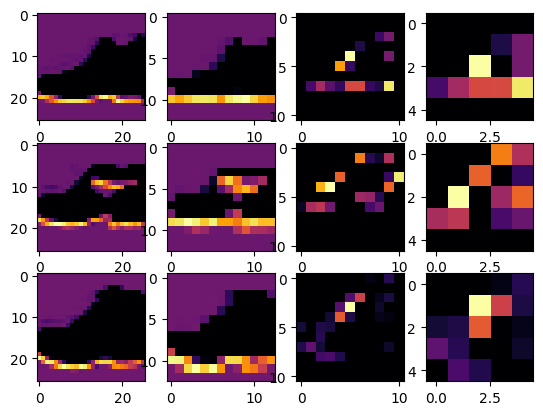

In [7]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

8. Exercises
Exercise 1
Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact does that have on accuracy and training time?

Exercise 2
Remove the final convolution. What impact does that have on accuracy or training time?

Exercise 3
Add more convolutions. What impact does that have?

Exercise 4
Remove all convolutions but the first. What impact does that have? Experiment with it.